# One sample test on simulated bulk RNA-seq

Nuha BinTayyash, 2020

This notebook shows how to run GPcounts with one sample test  and the resulted ROC curves on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
import pandas as pd
from GPcounts.GPcounts_Module import Fit_GPcounts
import gpflow
from helper import plot 

In [ ]:
files = [
    '../data/low_counts_low_dispersion_0.csv'
    ,'../data/low_counts_high_dispersion_0.csv'                                     
    ,'../data/high_counts_low_dispersion_0.csv'
    ,'../data/high_counts_high_dispersion_0.csv'
    ]
  
X = pd.read_csv('../data/time_points0.csv',index_col=[0])

for file in files:
    print(file)
    Y = pd.read_csv(file,index_col=[0])
    likelihoods = ['Negative_binomial','Gaussian','Poisson'] 
    for likelihood in likelihoods:
        gp_counts = Fit_GPcounts(X,Y,safe_mode = True) 
        results = gp_counts.One_sample_test(likelihood)
        file = file.replace("../data/", "")
        results.to_csv("../data/ll_ratio_"+likelihood+"_"+file)
    

To do Anscombe_transformation, run /Analysis/Theory/Anscombe transformation.ipynb notebook from [SpatialDE](https://github.com/Teichlab/SpatialDE) package

In [ ]:
files = [
    '../data/Anscombe_transformation_low_counts_low_dispersion_0.csv',
    '../data/Anscombe_transformation_low_counts_high_dispersion_0.csv',                                     
    '../data/Anscombe_transformation_high_counts_low_dispersion_0.csv',
    '../data/Anscombe_transformation_high_counts_high_dispersion_0.csv'
    ]
                     
X = pd.read_csv('../data/time_points.csv',index_col=[0])

for file in files:
    print(file)
    Y = pd.read_csv(file,index_col=[0])    
    
    likelihoods = ['Gaussian']
    for likelihood in likelihoods:
        gp_counts = Fit_GPcounts(X,Y,safe_mode = True) 
        results = gp_counts.One_sample_test(likelihood,transform = False)
        file = file.replace("../data/", "")
        results.to_csv("../data/ll_ratio_"+likelihood+'_'+file)
       

In [2]:
from matplotlib import pyplot as plt
from sklearn import metrics

\* Note in one sample tesr we set negative log likelihood ratios are to zero

### Roc curves 

In [ ]:
filesname = [
            'low_counts_low_dispersion_0.csv'
            ,'low_counts_high_dispersion_0.csv'                                     
            ,'high_counts_low_dispersion_0.csv'
            ,'high_counts_high_dispersion_0.csv'
            ]
            
for file in filesname:
    print(file)
    
    Gaussian = pd.read_csv('../data/ll_ratio_Gaussian_'+file,index_col=[0])
    Gaussian_anscombe = pd.read_csv('../data/ll_ratio_Gaussian_Anscombe_transformation_'+file,index_col=[0])
    NegativeBinomial = pd.read_csv('../data/ll_ratio_Negative_binomial_'+file,index_col=[0])
    Poisson = pd.read_csv('../data/ll_ratio_Poisson_'+file,index_col=[0])
    
    
    D = NegativeBinomial.shape[0]
    true_label = np.zeros(D)
    
    for j in range(D):
        if j %2 == 0:
            true_label[j] = 1
    
    labels = pd.DataFrame(true_label, index =NegativeBinomial.index.values, columns =['label'])
    NegativeBinomial = pd.concat([NegativeBinomial,labels],axis = 1)
    fig = plt.figure()
    
    plt.tick_params(labelsize='large', width=2)     
    fpr_NB, tpr_NB, thresholds_NB = metrics.roc_curve( NegativeBinomial['label'], NegativeBinomial['log_likelihood_ratio'])
    AUC_NB=metrics.auc(fpr_NB, tpr_NB)
    plt.plot(fpr_NB, tpr_NB,color='green',label='Negative binomial {0:.4f}'.format(AUC_NB))
    
    fpr_G, tpr_G, thresholds_G = metrics.roc_curve(NegativeBinomial['label'],Gaussian['log_likelihood_ratio'])
    AUC_G=metrics.auc(fpr_G, tpr_G)
    plt.plot(fpr_G, tpr_G, color='darkorange', label='Gaussian {0:.4f}'.format(AUC_G))
    
    fpr_G_a, tpr_G_a, thresholds_G_a = metrics.roc_curve(NegativeBinomial['label'],Gaussian_anscombe['log_likelihood_ratio'])
    AUC_G_a=metrics.auc(fpr_G_a, tpr_G_a)
    plt.plot(fpr_G_a, tpr_G_a, color='red', label='Gaussian with Anscombe {0:.4f}'.format(AUC_G_a))
    
    fpr_P, tpr_P, thresholds_P = metrics.roc_curve( NegativeBinomial['label'], Poisson['log_likelihood_ratio'])
    AUC_P=metrics.auc(fpr_P, tpr_P)
    plt.plot(fpr_P, tpr_P,color='blue',label='Poisson {0:.4f}'.format(AUC_P))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    plt.legend(loc='upper center', bbox_to_anchor=(.70, 0.32))
    plt.xlabel('False positive rate', fontsize=16)
    plt.ylabel('True positive rate', fontsize=16)
    plt.show()
    

In [ ]:
 # plot low_low
file = '../data/low_counts_low_dispersion_0.csv'
   
X = pd.read_csv('../data/time_points0.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])
#gene_1_84
gp_counts = Fit_GPcounts(X,Y.iloc[262:266,:],safe_mode = True) 
likelihood = 'Negative_binomial' 
results = gp_counts.One_sample_test(likelihood)
display(results)
params = gp_counts.load_predict_models(Y.iloc[0:4,:].index.values,'One_sample_test','Negative_binomial')
plot(params,X.values,Y.iloc[0:4,:])

In [ ]:
file = '../data/low_counts_high_dispersion_0.csv'
  
X = pd.read_csv('../data/time_points0.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])

gp_counts = Fit_GPcounts(X,Y) 

params = gp_counts.load_predict_models(Y.iloc[0:4,:].index.values,'One_sample_test','Negative_binomial')
plot(params,X.values,Y.iloc[0:4,:])

100%|██████████| 4/4 [00:08<00:00,  2.10s/it]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
gene_2_43,-42.754988,-48.164339,5.409351
gene_2_125,-49.005097,-53.020764,4.015667
gene_2_165,-43.942986,-70.113612,26.170626
gene_2_393,-42.366695,-45.786480,3.419785


100%|██████████| 4/4 [00:04<00:00,  1.17s/it]

gene_2_43


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.995779943978009
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.08880463169025495
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.9280389140113668
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[-8.53430368e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[6.81495944e-01, 0.00000000e+00, 0.00000000e+00..."


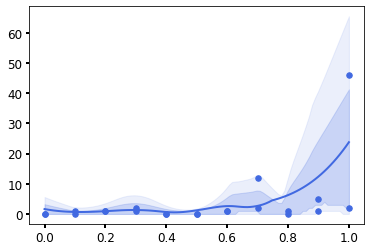

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.550345949007777
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,3.319722557523138
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[9.54833283e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[2.97047112e-01, 0.00000000e+00, 0.00000000e+00..."


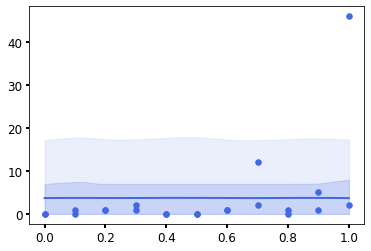

gene_2_125


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,6.769020663375113
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.1872201539828608
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.083753895848061
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[1.42173102e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[2.68697932e-01, 0.00000000e+00, 0.00000000e+00..."


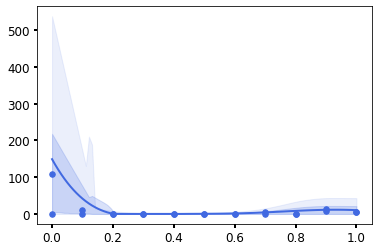

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,4.1964378385223
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,6.192159819026004
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[9.70818903e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[2.39825246e-01, 0.00000000e+00, 0.00000000e+00..."


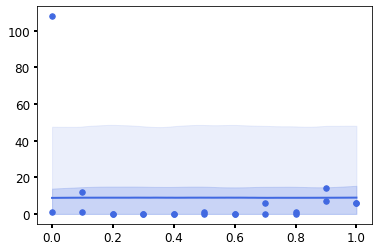

gene_2_165


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.2429119172172047
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.004479833951261616
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.0800016482000672e-07
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[1.88322741e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[4.70431766e-01, 0.00000000e+00, 0.00000000e+00..."


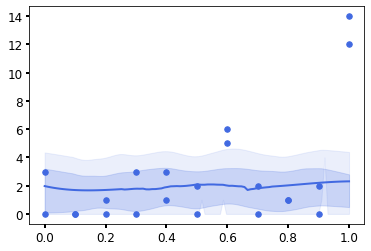

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.8384602416928122
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.0801387128800609e-07
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[9.89340313e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[1.45797183e-01, 0.00000000e+00, 0.00000000e+00..."


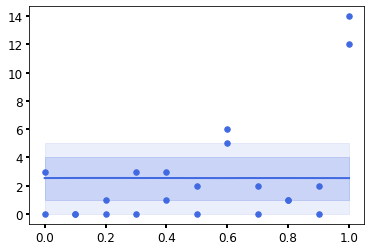

gene_2_393


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.916519015770598
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.018340692080059957
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.0719083152604487
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[1.48889336e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[4.15332241e-01, 0.00000000e+00, 0.00000000e+00..."


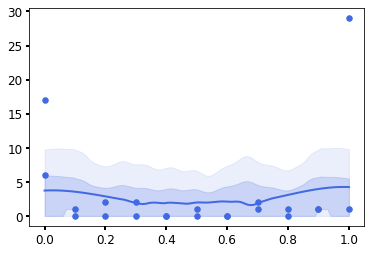

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.125298121628871
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,3.2908259200393077
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[9.39513166e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[3.42524925e-01, 0.00000000e+00, 0.00000000e+00..."


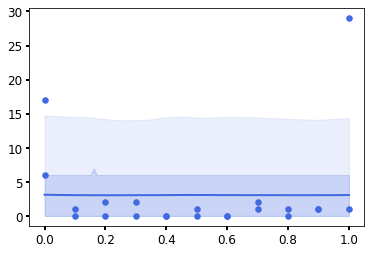

In [13]:
file = '../data/low_counts_high_dispersion_0.csv'
  
X = pd.read_csv('../data/time_points0.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])

gp_counts = Fit_GPcounts(X,Y.loc[['gene_2_43','gene_2_125','gene_2_165','gene_2_393']],safe_mode = True) 
likelihood = 'Negative_binomial' 
results = gp_counts.One_sample_test(likelihood)
display(results)
params = gp_counts.load_predict_models(Y.loc[['gene_2_43','gene_2_125','gene_2_165','gene_2_393']].index.values,'One_sample_test','Negative_binomial')

plot(params,X.values,Y.loc[['gene_2_43','gene_2_125','gene_2_165','gene_2_393']])

100%|██████████| 4/4 [00:02<00:00,  1.89it/s]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
gene_2_43,-30.501025,-31.382531,0.881506
gene_2_125,-37.800349,-37.800343,-0.000005
gene_2_165,-29.755036,-29.367872,-0.387164
gene_2_393,-30.341227,-31.130580,0.789353


100%|██████████| 4/4 [00:00<00:00, 17.80it/s]

gene_2_43


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.02221
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.12224
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.507454


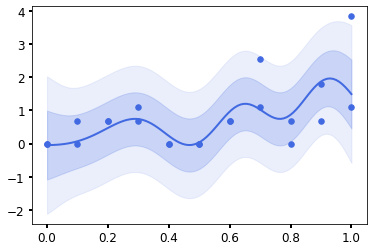

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.559632
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.89843


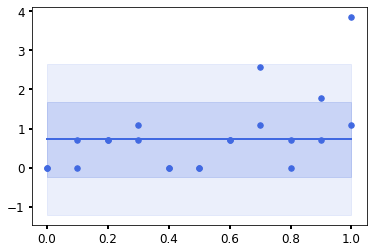

gene_2_125


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.807492
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,421.64
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.62554


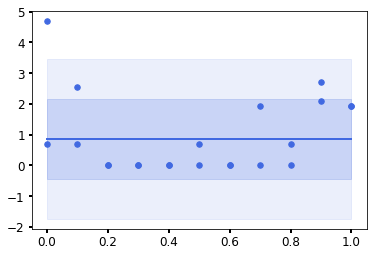

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.8075
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.62554


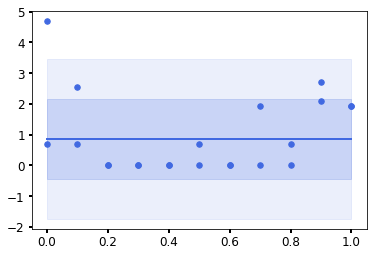

gene_2_165


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.23295
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.165031
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.487334


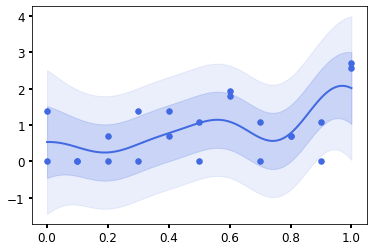

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.731347
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.733088


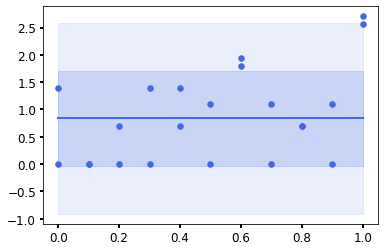

gene_2_393


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,2.49405
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.46399
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.605741


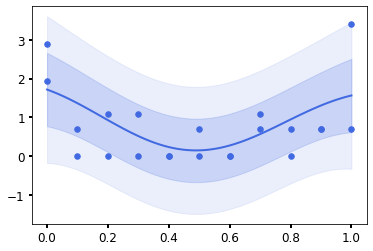

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.51469
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.880446


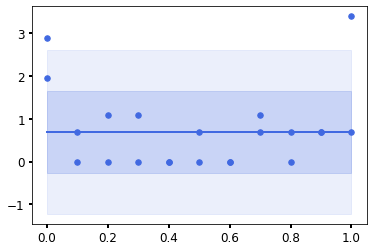

In [14]:
file = '../data/low_counts_high_dispersion_0.csv'
  
X = pd.read_csv('../data/time_points0.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])

gp_counts = Fit_GPcounts(X,Y.loc[['gene_2_43','gene_2_125','gene_2_165','gene_2_393']],safe_mode = True) 
likelihood = 'Gaussian' 
results = gp_counts.One_sample_test(likelihood)
display(results)
params = gp_counts.load_predict_models(Y.loc[['gene_2_43','gene_2_125','gene_2_165','gene_2_393']].index.values,'One_sample_test','Gaussian')

plot(params,X.values,Y.loc[['gene_2_43','gene_2_125','gene_2_165','gene_2_393']])

In [ ]:
file = '../data/high_counts_low_dispersion_0.csv'
  
X = pd.read_csv('../data/time_points0.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])

gp_counts = Fit_GPcounts(X,Y.loc[['gene_2_43','gene_2_125','gene_2_165','gene_2_393']],safe_mode = True) 
params = gp_counts.load_predict_models(Y.loc[['gene_2_43','gene_2_125','gene_2_165','gene_2_393']].index.values,'One_sample_test','Negative_binomial')

plot(params,X.values,Y.loc[['gene_2_43','gene_2_125','gene_2_165','gene_2_393']])

100%|██████████| 4/4 [00:09<00:00,  2.31s/it]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
gene_4_263,-137.439793,-155.078696,17.638902
gene_4_264,-135.522354,-135.522508,0.000154
gene_4_265,-204.636893,-201.591054,-3.045839
gene_4_266,-209.231534,-210.570644,1.339110


100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

gene_4_263


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,29.70753904344508
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.3952438400791754
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.490023905801349
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[1.48768883e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[-7.45563074e-02, 0.00000000e+00, 0.00000000e+00..."


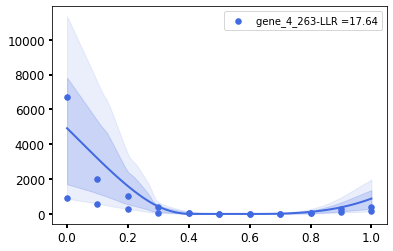

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,41.612746981300724
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.76963950965521
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[9.98496768e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[-5.44129593e-02, 0.00000000e+00, 0.00000000e+00..."


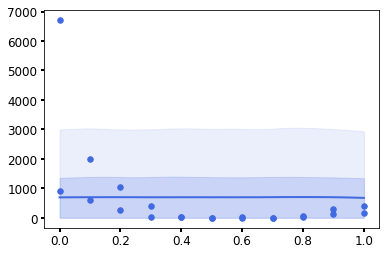

gene_4_264


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,26.368909732885346
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,120.62299084385333
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.7496071664198962
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[9.98189103e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[5.47401974e-02, 0.00000000e+00, 0.00000000e+00..."


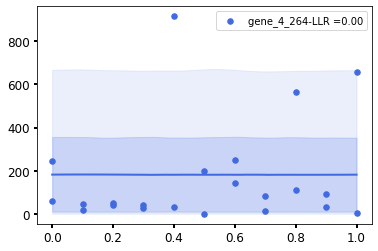

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,26.361291515238577
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.7498119267025776
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[9.98571353e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[5.45376181e-02, 0.00000000e+00, 0.00000000e+00..."


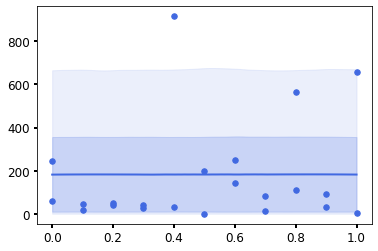

gene_4_265


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,44.35098282450249
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.18590216380336266
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.9499874656396331
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[9.21363457e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[8.54940631e-02, 0.00000000e+00, 0.00000000e+00..."


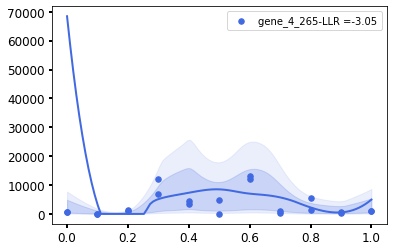

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,52.82309470370673
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.7073930052466597
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[1.11663373e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[3.80797805e-02, 0.00000000e+00, 0.00000000e+00..."


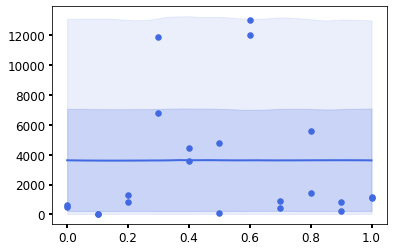

gene_4_266


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,59.80701024928063
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,5.126051905922419
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.176304232250959
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[1.16329705e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[-4.84314346e-02, 0.00000000e+00, 0.00000000e+00..."


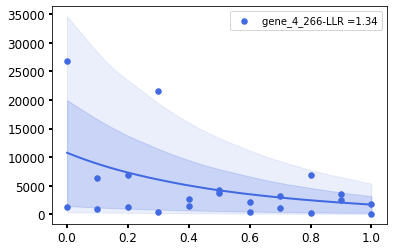

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,59.9523516505658
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.3738002887866778
VGP.likelihood.scale,Parameter,Identity,,False,(),float64,1.0
VGP.q_mu,Parameter,Identity,,True,"(22, 1)",float64,[[1.08997557e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[3.21188674e-02, 0.00000000e+00, 0.00000000e+00..."


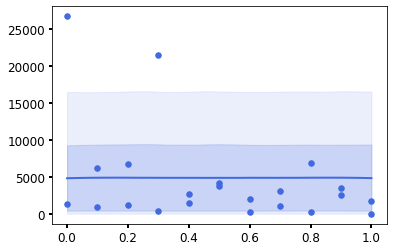

In [7]:
file = '../data/high_counts_high_dispersion_0.csv'
  
X = pd.read_csv('../data/time_points0.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])
gp_counts = Fit_GPcounts(X,Y.iloc[262:266,:],safe_mode = True) 
likelihood = 'Negative_binomial' 
results = gp_counts.One_sample_test(likelihood)
display(results)
#gp_counts = Fit_GPcounts(X,Y) 
params = gp_counts.load_predict_models(Y.iloc[262:266,:].index.values,'One_sample_test','Negative_binomial')
plot(params,X.values,Y.iloc[262:266,:],results)

In [8]:
NegativeBinomial = pd.read_csv('../data/ll_ratio_Negative_binomial_low_counts_high_dispersion_0.csv',index_col=[0])
NegativeBinomial.sort_values(by=['log_likelihood_ratio'], ascending=False).iloc[0:30,:]

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
gene_2_165,-43.942987,-70.113597,26.170611
gene_2_57,-39.879647,-61.241192,21.361545
gene_2_339,-46.882617,-59.278603,12.395986
gene_2_575,-66.558578,-76.207384,9.648805
gene_2_433,-44.251034,-53.445648,9.194615
gene_2_343,-31.278275,-40.069752,8.791477
gene_2_539,-46.344544,-54.834504,8.489960
gene_2_121,-52.591632,-61.052502,8.460870
gene_2_409,-61.343066,-68.731283,7.388217
gene_2_261,-56.304284,-63.570961,7.266677


In [10]:
Gaussian = pd.read_csv('../data/ll_ratio_Gaussian_low_counts_high_dispersion_0.csv',index_col=[0])
Gaussian.sort_values(by=['log_likelihood_ratio'], ascending=True).iloc[0:30,:]

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
gene_2_410,-37.619191,-33.851199,-3.767992
gene_2_401,-38.616713,-35.058593,-3.558120
gene_2_422,-38.898842,-35.667817,-3.231025
gene_2_308,-30.775354,-27.551459,-3.223895
gene_2_134,-31.178596,-28.021500,-3.157097
gene_2_496,-39.929513,-36.810257,-3.119256
gene_2_469,-25.404668,-22.497782,-2.906886
gene_2_590,-33.922402,-31.190083,-2.732319
gene_2_553,-33.857235,-31.219062,-2.638174
gene_2_42,-26.529647,-24.134612,-2.395035
